In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
### This notebook compares different transforms with different factors and different emax and extracts the best RMSE for different n
#(learning curves)
#a = 6.0

In [18]:
############################### N = 100 ###############################

Path = '/home/ach/radial-physics_new/radial-physics/output/All_trafo_all_n/100'

emaxs = [300, 400, 500, 600, 700]
transforms = [2, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
no_of_tr = len(transforms)
minimia_all_tr_qm9 = [1000]*no_of_tr
minimia_all_tr_ch4 = [1000]*no_of_tr
minimia_all_tr_gold = [1000]*no_of_tr

for count,i in enumerate(transforms):
    
    for emax in emaxs:

        #Define/reset lists + open data
        factor_qm9 = []#QM9
        rmse_qm9 = []
        data_qm9 = open(Path+f'/Data_TR{i}_E{emax}_qm9','r')

        factor_gold = [] #Gold
        rmse_gold = []
        data_gold = open(Path+f'/Data_TR{i}_E{emax}_gold','r')

        factor_ch4 = [] #Methane
        rmse_ch4 = []
        data_ch4 = open(Path+f'/Data_TR{i}_E{emax}_random-ch4-10k','r')

        for row in data_qm9: #ch4
            row = row.split(' ')
            factor_qm9.append(float(row[0]))
            rmse_qm9.append(float(row[2]))
        
        for row in data_gold: #Gold
            row = row.split(' ')
            factor_gold.append(float(row[0]))
            rmse_gold.append(float(row[2])*0.0230605)
        
        for row in data_ch4: #Methane
            row = row.split(' ')
            factor_ch4.append(float(row[0]))#
            rmse_ch4.append(float(row[2]))
        


        #indices of minima and minima (for plot later)
        minimum_indx_qm9 = np.argmin(rmse_qm9,axis=0)
        minimum_indx_ch4 = np.argmin(rmse_ch4,axis=0)
        minimum_indx_gold = np.argmin(rmse_gold,axis=0)
        
        if rmse_qm9[minimum_indx_qm9] < minimia_all_tr_qm9[count]:
            minimia_all_tr_qm9[count] = (rmse_qm9[minimum_indx_qm9])
        if rmse_ch4[minimum_indx_ch4] < minimia_all_tr_ch4[count]:
            minimia_all_tr_ch4[count] = (rmse_ch4[minimum_indx_ch4])
        if rmse_gold[minimum_indx_gold] < minimia_all_tr_gold[count]:
            minimia_all_tr_gold[count] = (rmse_gold[minimum_indx_gold])

        #extract TR2 error
        if i ==2:
            minimum_TR2_qm9_100 = np.min(rmse_qm9)
            minimum_TR2_ch4_100 = np.min(rmse_ch4)
            minimum_TR2_gold_100 = np.min(rmse_gold)

        '''fig, ax = plt.subplots()
        fig.subplots_adjust(right=0.75)

        twin1 = ax.twinx()
        twin2 = ax.twinx()

        # Offset the right spine of twin2.  The ticks and label have already been
        # placed on the right by twinx above.
        twin2.spines.right.set_position(("axes", 1.2))

        p1, = ax.plot(factor_qm9, rmse_qm9 , "b-o", label="QM9")
        p2, = twin1.plot(factor_ch4, rmse_ch4, "r-o", label="CH4")
        p3, = twin2.plot(factor_gold, rmse_gold, "g-o", label="Gold")

        # ax.set_xlim(0, 2)
        # ax.set_ylim(0, 2)
        # twin1.set_ylim(0, 4)
        # twin2.set_ylim(1, 65)

        ax.set_xlabel("Factor")
        ax.set_ylabel("QM9 RMSE [kcal/mol]")
        ax.set_title(f"Transform {i}, Emax {emax}")
        twin1.set_ylabel("CH4 RMSE [kcal/mol]")
        twin2.set_ylabel("Gold RMSE [kcal/mol]")

        # ax.yaxis.label.set_color(p1.get_color())
        # twin1.yaxis.label.set_color(p2.get_color())
        # twin2.yaxis.label.set_color(p3.get_color())

        tkw = dict(size=4, width=1.5)
        ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
        twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
        twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
        ax.tick_params(axis='x', **tkw)

        # ax.legend(handles=[p1, p2, p3], loc = 'best')
        # fig.legend(bbox_to_anchor=(1, 1.), ncol=5)

        if emax == 300:
            ax.axhline(19.05768002860423, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(44.300687875278705, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(136.8698847586963*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 400:
            ax.axhline(17.511311028044624, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(34.61511570032176, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(142.67015675611322*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 500:
            ax.axhline(17.19218557978529, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(30.86310618913839, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(149.92978103314806*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 600:
            ax.axhline(16.9462610721415, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(30.55262312454953, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(154.6440404015222*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 700:
            ax.axhline(16.516343131938108, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(29.177390257782466, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(161.3940707079771*0.0230605, color='green', linestyle='solid',linewidth=1)
        
        from matplotlib.lines import Line2D
        line1 = Line2D([0], [0], label='No transform', color='black')
        fig.legend(handles=[line1, p1, p2, p3], bbox_to_anchor=(0.8, 1.02), ncol=5,)

        # ax.legend(handles=[p1, p2, p3], loc = 'best')
        # fig.legend(bbox_to_anchor=(1, 1.), ncol=5,)
        plt.show()'''        

QM9 Min RMSE: 7.98
QM9 Best transform:  22
CH4 Min RMSE: 15.63
CH4 Best transform:  26
Gold Min RMSE: 2.85
Gold Best transform:  14


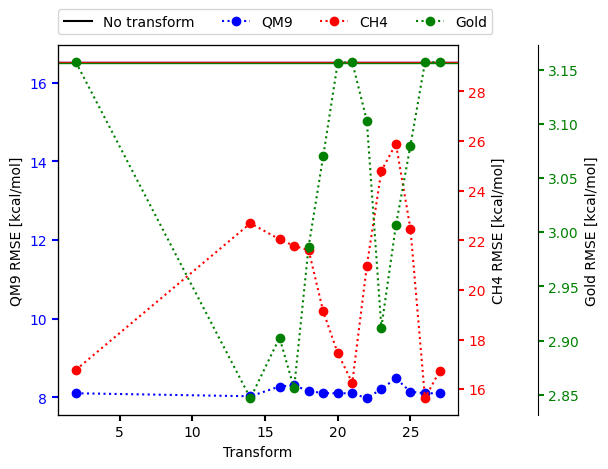

In [19]:
############################### N = 100 ###############################
### one plot for each data set with all minima:


fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines.right.set_position(("axes", 1.2))

p1, = ax.plot(transforms, minimia_all_tr_qm9 , "bo", label="QM9", ls = ':')  #range(1,no_of_tr+1)
p2, = twin1.plot(transforms, minimia_all_tr_ch4, "r:o", label="CH4")
p3, = twin2.plot(transforms, minimia_all_tr_gold, "g:o", label="Gold")

# ax.set_xlim(0, 2)
# ax.set_ylim(0, 2)
# twin1.set_ylim(0, 4)
# twin2.set_ylim(1, 65)

ax.set_xlabel("Transform")
ax.set_ylabel("QM9 RMSE [kcal/mol]")
#ax.set_title("Minimum RMSE for all transforms")
twin1.set_ylabel("CH4 RMSE [kcal/mol]")
twin2.set_ylabel("Gold RMSE [kcal/mol]")

# ax.yaxis.label.set_color(p1.get_color())
# twin1.yaxis.label.set_color(p2.get_color())
# twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

# Add RMSE without transform
ax.axhline(16.516343131938108, color='blue', linestyle='solid',linewidth=1)
twin1.axhline(29.177390257782466, color='red', linestyle='solid',linewidth=1)
twin2.axhline(136.8698847586963*0.0230605, color='green', linestyle='solid',linewidth=1)
# ax.legend(handles=[p1, p2, p3], loc = 'best')

from matplotlib.lines import Line2D
line1 = Line2D([0], [0], label='No transform', color='black')
fig.legend(handles=[line1, p1, p2, p3], bbox_to_anchor=(0.815, 0.97), ncol=5,)
#plt.savefig('RMSE_all_trafo.png', bbox_inches='tight')

min_err = np.min(minimia_all_tr_qm9)
min_err_idx = np.argmin(minimia_all_tr_qm9)
print('QM9 Min RMSE: {0:.2f}'.format(min_err))
print('QM9 Best transform: ', transforms[min_err_idx])
min_errors_qm9_100 = min_err

min_err = np.min(minimia_all_tr_ch4)
min_err_idx = np.argmin(minimia_all_tr_ch4)
print('CH4 Min RMSE: {0:.2f}'.format(min_err))
print('CH4 Best transform: ', transforms[min_err_idx])
min_errors_ch4_100 = min_err

min_err = np.min(minimia_all_tr_gold)
min_err_idx = np.argmin(minimia_all_tr_gold)
print('Gold Min RMSE: {0:.2f}'.format(min_err))
print('Gold Best transform: ', transforms[min_err_idx])
min_errors_gold_100 = min_err


In [20]:
############################### N = 500 ###############################

Path = '/home/ach/radial-physics_new/radial-physics/output/All_trafo_all_n/500'

emaxs = [300, 400, 500, 600, 700]
transforms = [2, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27] #[-2,1,2,3,4,5,6,7,8] # -2 includes the radial scaling
no_of_tr = len(transforms)
minimia_all_tr_qm9 = [1000]*no_of_tr
minimia_all_tr_ch4 = [1000]*no_of_tr
minimia_all_tr_gold = [1000]*no_of_tr

for count,i in enumerate(transforms): # range(1,no_of_tr+1)
    
    for emax in emaxs:

        #Define/reset lists + open data
        factor_qm9 = []#QM9
        rmse_qm9 = []
        data_qm9 = open(Path+f'/Data_TR{i}_E{emax}_qm9','r')

        factor_gold = [] #Gold
        rmse_gold = []
        data_gold = open(Path+f'/Data_TR{i}_E{emax}_gold','r')

        factor_ch4 = [] #Methane
        rmse_ch4 = []
        data_ch4 = open(Path+f'/Data_TR{i}_E{emax}_random-ch4-10k','r')

        for row in data_qm9: #QM9
            row = row.split(' ')
            factor_qm9.append(float(row[0]))
            rmse_qm9.append(float(row[2]))
        
        for row in data_gold: #Gold
            row = row.split(' ')
            factor_gold.append(float(row[0]))
            rmse_gold.append(float(row[2])*0.0230605)
        
        for row in data_ch4: #Methane
            row = row.split(' ')
            factor_ch4.append(float(row[0]))#
            rmse_ch4.append(float(row[2]))
        


        #indices of minima and minima (for plot later)
        minimum_indx_qm9 = np.argmin(rmse_qm9,axis=0)
        minimum_indx_ch4 = np.argmin(rmse_ch4,axis=0)
        minimum_indx_gold = np.argmin(rmse_gold,axis=0)
        
        if rmse_qm9[minimum_indx_qm9] < minimia_all_tr_qm9[count]:
            minimia_all_tr_qm9[count] = (rmse_qm9[minimum_indx_qm9])
        if rmse_ch4[minimum_indx_ch4] < minimia_all_tr_ch4[count]:
            minimia_all_tr_ch4[count] = (rmse_ch4[minimum_indx_ch4])
        if rmse_gold[minimum_indx_gold] < minimia_all_tr_gold[count]:
            minimia_all_tr_gold[count] = (rmse_gold[minimum_indx_gold])

        #extract TR2 error
        if i ==2:
            minimum_TR2_qm9_500 = np.min(rmse_qm9)
            minimum_TR2_ch4_500 = np.min(rmse_ch4)
            minimum_TR2_gold_500 = np.min(rmse_gold)

        '''
        fig, ax = plt.subplots()
        fig.subplots_adjust(right=0.75)

        twin1 = ax.twinx()
        twin2 = ax.twinx()

        # Offset the right spine of twin2.  The ticks and label have already been
        # placed on the right by twinx above.
        twin2.spines.right.set_position(("axes", 1.2))

        p1, = ax.plot(factor_qm9, rmse_qm9 , "b-o", label="QM9")
        p2, = twin1.plot(factor_ch4, rmse_ch4, "r-o", label="CH4")
        p3, = twin2.plot(factor_gold, rmse_gold, "g-o", label="Gold")

        # ax.set_xlim(0, 2)
        # ax.set_ylim(0, 2)
        # twin1.set_ylim(0, 4)
        # twin2.set_ylim(1, 65)

        ax.set_xlabel("Factor")
        ax.set_ylabel("QM9 RMSE [kcal/mol]")
        ax.set_title(f"Transform {i}, Emax {emax}")
        twin1.set_ylabel("CH4 RMSE [kcal/mol]")
        twin2.set_ylabel("Gold RMSE [kcal/mol]")

        # ax.yaxis.label.set_color(p1.get_color())
        # twin1.yaxis.label.set_color(p2.get_color())
        # twin2.yaxis.label.set_color(p3.get_color())

        tkw = dict(size=4, width=1.5)
        ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
        twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
        twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
        ax.tick_params(axis='x', **tkw)

        # ax.legend(handles=[p1, p2, p3], loc = 'best')
        # fig.legend(bbox_to_anchor=(1, 1.), ncol=5)

        if emax == 300:
            ax.axhline(9.895187282884605, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(20.22356481808921, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(104.30245557087522*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 400:
            ax.axhline(9.053619521844283, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(19.093710143344165, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(90.755483859247*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 500:
            ax.axhline(8.847942916852386, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(18.150132009197737, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(91.64686368168655*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 600:
            ax.axhline(8.563998971848957, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(18.91482158693692, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(91.97986522815972*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 700:
            ax.axhline(8.418524498467612, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(16.478870024988346, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(90.2603631096119*0.0230605, color='green', linestyle='solid',linewidth=1)

        from matplotlib.lines import Line2D
        line1 = Line2D([0], [0], label='No transform', color='black')
        fig.legend(handles=[line1, p1, p2, p3], bbox_to_anchor=(0.8, 1.02), ncol=5,)

        # ax.legend(handles=[p1, p2, p3], loc = 'best')
        # fig.legend(bbox_to_anchor=(1, 1.), ncol=5,)
        plt.show()
        '''
        

QM9 Min RMSE: 3.80
QM9 Best transform:  22
CH4 Min RMSE: 8.06
CH4 Best transform:  26
Gold Min RMSE: 1.97
Gold Best transform:  14


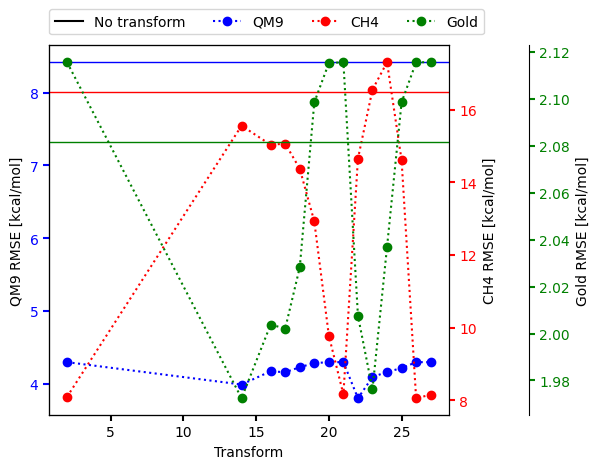

In [21]:
############################### N = 500 ###############################
### one plot for each data set with all minima:


fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines.right.set_position(("axes", 1.2))

p1, = ax.plot(transforms, minimia_all_tr_qm9 , "bo", label="QM9", ls = ':')  #range(1,no_of_tr+1)
p2, = twin1.plot(transforms, minimia_all_tr_ch4, "r:o", label="CH4")
p3, = twin2.plot(transforms, minimia_all_tr_gold, "g:o", label="Gold")

# ax.set_xlim(0, 2)
# ax.set_ylim(0, 2)
# twin1.set_ylim(0, 4)
# twin2.set_ylim(1, 65)

ax.set_xlabel("Transform")
ax.set_ylabel("QM9 RMSE [kcal/mol]")
#ax.set_title("Minimum RMSE for all transforms")
twin1.set_ylabel("CH4 RMSE [kcal/mol]")
twin2.set_ylabel("Gold RMSE [kcal/mol]")

# ax.yaxis.label.set_color(p1.get_color())
# twin1.yaxis.label.set_color(p2.get_color())
# twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

# Add RMSE without transform
ax.axhline(8.418524498467612, color='blue', linestyle='solid',linewidth=1)
twin1.axhline(16.478870024988346, color='red', linestyle='solid',linewidth=1)
twin2.axhline(90.2603631096119*0.0230605, color='green', linestyle='solid',linewidth=1)
# ax.legend(handles=[p1, p2, p3], loc = 'best')


from matplotlib.lines import Line2D
line1 = Line2D([0], [0], label='No transform', color='black')
fig.legend(handles=[line1, p1, p2, p3], bbox_to_anchor=(0.815, 0.97), ncol=5,)
#plt.savefig('RMSE_all_trafo.png', bbox_inches='tight')

min_err = np.min(minimia_all_tr_qm9)
min_err_idx = np.argmin(minimia_all_tr_qm9)
print('QM9 Min RMSE: {0:.2f}'.format(min_err))
print('QM9 Best transform: ', transforms[min_err_idx])
min_errors_qm9_500 = min_err

min_err = np.min(minimia_all_tr_ch4)
min_err_idx = np.argmin(minimia_all_tr_ch4)
print('CH4 Min RMSE: {0:.2f}'.format(min_err))
print('CH4 Best transform: ', transforms[min_err_idx])
min_errors_ch4_500 = min_err

min_err = np.min(minimia_all_tr_gold)
min_err_idx = np.argmin(minimia_all_tr_gold)
print('Gold Min RMSE: {0:.2f}'.format(min_err))
print('Gold Best transform: ', transforms[min_err_idx])
min_errors_gold_500 = min_err


In [22]:
############################### N = 1000 ###############################

Path = '/home/ach/radial-physics_new/radial-physics/output/All_trafo_all_n/1000'

emaxs = [300, 400, 500, 600, 700]
transforms = [2, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27] #[-2,1,2,3,4,5,6,7,8] # -2 includes the radial scaling
no_of_tr = len(transforms)
minimia_all_tr_qm9 = [1000]*no_of_tr
minimia_all_tr_ch4 = [1000]*no_of_tr
minimia_all_tr_gold = [1000]*no_of_tr

for count,i in enumerate(transforms): # range(1,no_of_tr+1)
    
    for emax in emaxs:

        #Define/reset lists + open data
        factor_qm9 = []#QM9
        rmse_qm9 = []
        data_qm9 = open(Path+f'/Data_TR{i}_E{emax}_qm9','r')

        factor_gold = [] #Gold
        rmse_gold = []
        data_gold = open(Path+f'/Data_TR{i}_E{emax}_gold','r')

        factor_ch4 = [] #Methane
        rmse_ch4 = []
        data_ch4 = open(Path+f'/Data_TR{i}_E{emax}_random-ch4-10k','r')

        for row in data_qm9: #QM9
            row = row.split(' ')
            factor_qm9.append(float(row[0]))
            rmse_qm9.append(float(row[2]))
        
        for row in data_gold: #Gold
            row = row.split(' ')
            factor_gold.append(float(row[0]))
            rmse_gold.append(float(row[2])*0.0230605)
        
        for row in data_ch4: #Methane
            row = row.split(' ')
            factor_ch4.append(float(row[0]))#
            rmse_ch4.append(float(row[2]))
        


        #indices of minima and minima (for plot later)
        minimum_indx_qm9 = np.argmin(rmse_qm9,axis=0)
        minimum_indx_ch4 = np.argmin(rmse_ch4,axis=0)
        minimum_indx_gold = np.argmin(rmse_gold,axis=0)
        
        if rmse_qm9[minimum_indx_qm9] < minimia_all_tr_qm9[count]:
            minimia_all_tr_qm9[count] = (rmse_qm9[minimum_indx_qm9])
        if rmse_ch4[minimum_indx_ch4] < minimia_all_tr_ch4[count]:
            minimia_all_tr_ch4[count] = (rmse_ch4[minimum_indx_ch4])
        if rmse_gold[minimum_indx_gold] < minimia_all_tr_gold[count]:
            minimia_all_tr_gold[count] = (rmse_gold[minimum_indx_gold])

        #extract TR2 error
        if i ==2:
            minimum_TR2_qm9_1000 = np.min(rmse_qm9)
            minimum_TR2_ch4_1000 = np.min(rmse_ch4)
            minimum_TR2_gold_1000 = np.min(rmse_gold)

        '''fig, ax = plt.subplots()
        fig.subplots_adjust(right=0.75)

        twin1 = ax.twinx()
        twin2 = ax.twinx()

        # Offset the right spine of twin2.  The ticks and label have already been
        # placed on the right by twinx above.
        twin2.spines.right.set_position(("axes", 1.2))

        p1, = ax.plot(factor_qm9, rmse_qm9 , "b-o", label="QM9")
        p2, = twin1.plot(factor_ch4, rmse_ch4, "r-o", label="CH4")
        p3, = twin2.plot(factor_gold, rmse_gold, "g-o", label="Gold")

        # ax.set_xlim(0, 2)
        # ax.set_ylim(0, 2)
        # twin1.set_ylim(0, 4)
        # twin2.set_ylim(1, 65)

        ax.set_xlabel("Factor")
        ax.set_ylabel("QM9 RMSE [kcal/mol]")
        ax.set_title(f"Transform {i}, Emax {emax}")
        twin1.set_ylabel("CH4 RMSE [kcal/mol]")
        twin2.set_ylabel("Gold RMSE [kcal/mol]")

        # ax.yaxis.label.set_color(p1.get_color())
        # twin1.yaxis.label.set_color(p2.get_color())
        # twin2.yaxis.label.set_color(p3.get_color())

        tkw = dict(size=4, width=1.5)
        ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
        twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
        twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
        ax.tick_params(axis='x', **tkw)

        # ax.legend(handles=[p1, p2, p3], loc = 'best')
        # fig.legend(bbox_to_anchor=(1, 1.), ncol=5)

        if emax == 300:
            ax.axhline(7.667893021202915, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(17.591063728376078, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(87.3233459159266*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 400:
            ax.axhline(7.153380601280076, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(15.321643999917857, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(82.79042884387587*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 500:
            ax.axhline(6.848859782595156, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(11.828434799093113, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(83.27298197193042*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 600:
            ax.axhline(6.548950162493874, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(11.501767337529323, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(84.01492039066628*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 700:
            ax.axhline(6.440701270931685, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(11.014133660205427, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(82.65392374237348*0.0230605, color='green', linestyle='solid',linewidth=1)

        from matplotlib.lines import Line2D
        line1 = Line2D([0], [0], label='No transform', color='black')
        fig.legend(handles=[line1, p1, p2, p3], bbox_to_anchor=(0.8, 1.02), ncol=5,)

        # ax.legend(handles=[p1, p2, p3], loc = 'best')
        # fig.legend(bbox_to_anchor=(1, 1.), ncol=5,)
        plt.show()'''
        

QM9 Min RMSE: 2.67
QM9 Best transform:  22
CH4 Min RMSE: 6.86
CH4 Best transform:  27
Gold Min RMSE: 1.70
Gold Best transform:  24


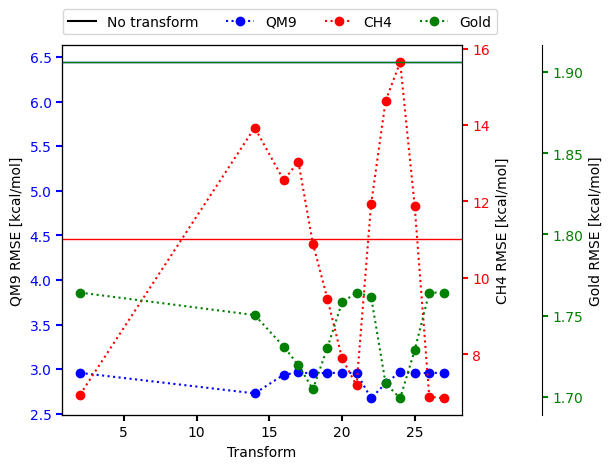

In [23]:
############################### N = 1000 ###############################
### one plot for each data set with all minima:


fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines.right.set_position(("axes", 1.2))

p1, = ax.plot(transforms, minimia_all_tr_qm9 , "bo", label="QM9", ls = ':')  #range(1,no_of_tr+1)
p2, = twin1.plot(transforms, minimia_all_tr_ch4, "r:o", label="CH4")
p3, = twin2.plot(transforms, minimia_all_tr_gold, "g:o", label="Gold")

# ax.set_xlim(0, 2)
# ax.set_ylim(0, 2)
# twin1.set_ylim(0, 4)
# twin2.set_ylim(1, 65)

ax.set_xlabel("Transform")
ax.set_ylabel("QM9 RMSE [kcal/mol]")
#ax.set_title("Minimum RMSE for all transforms")
twin1.set_ylabel("CH4 RMSE [kcal/mol]")
twin2.set_ylabel("Gold RMSE [kcal/mol]")

# ax.yaxis.label.set_color(p1.get_color())
# twin1.yaxis.label.set_color(p2.get_color())
# twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

# Add RMSE without transform
ax.axhline(6.440701270931685, color='blue', linestyle='solid',linewidth=1)
twin1.axhline(11.014133660205427, color='red', linestyle='solid',linewidth=1)
twin2.axhline(82.65392374237348*0.0230605, color='green', linestyle='solid',linewidth=1)
# ax.legend(handles=[p1, p2, p3], loc = 'best')

from matplotlib.lines import Line2D
line1 = Line2D([0], [0], label='No transform', color='black')
fig.legend(handles=[line1, p1, p2, p3], bbox_to_anchor=(0.815, 0.97), ncol=5,)
#plt.savefig('RMSE_all_trafo.png', bbox_inches='tight')

min_err = np.min(minimia_all_tr_qm9)
min_err_idx = np.argmin(minimia_all_tr_qm9)
print('QM9 Min RMSE: {0:.2f}'.format(min_err))
print('QM9 Best transform: ', transforms[min_err_idx])
min_errors_qm9_1000 = min_err

min_err = np.min(minimia_all_tr_ch4)
min_err_idx = np.argmin(minimia_all_tr_ch4)
print('CH4 Min RMSE: {0:.2f}'.format(min_err))
print('CH4 Best transform: ', transforms[min_err_idx])
min_errors_ch4_1000 = min_err

min_err = np.min(minimia_all_tr_gold)
min_err_idx = np.argmin(minimia_all_tr_gold)
print('Gold Min RMSE: {0:.2f}'.format(min_err))
print('Gold Best transform: ', transforms[min_err_idx])
min_errors_gold_1000 = min_err

In [24]:
############################### N = 1500 ###############################

Path = '/home/ach/radial-physics_new/radial-physics/output/All_trafo_all_n/1500'

emaxs = [300, 400, 500, 600, 700]
transforms = [2, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27] #[-2,1,2,3,4,5,6,7,8] # -2 includes the radial scaling
no_of_tr = len(transforms)
minimia_all_tr_qm9 = [1000]*no_of_tr
minimia_all_tr_ch4 = [1000]*no_of_tr
minimia_all_tr_gold = [1000]*no_of_tr

for count,i in enumerate(transforms): # range(1,no_of_tr+1)
    
    for emax in emaxs:

        #Define/reset lists + open data
        factor_qm9 = []#QM9
        rmse_qm9 = []
        data_qm9 = open(Path+f'/Data_TR{i}_E{emax}_qm9','r')

        factor_gold = [] #Gold
        rmse_gold = []
        data_gold = open(Path+f'/Data_TR{i}_E{emax}_gold','r')

        factor_ch4 = [] #Methane
        rmse_ch4 = []
        data_ch4 = open(Path+f'/Data_TR{i}_E{emax}_random-ch4-10k','r')

        for row in data_qm9: #QM9
            row = row.split(' ')
            factor_qm9.append(float(row[0]))
            rmse_qm9.append(float(row[2]))
        
        for row in data_gold: #Gold
            row = row.split(' ')
            factor_gold.append(float(row[0]))
            rmse_gold.append(float(row[2])*0.0230605)
        
        for row in data_ch4: #Methane
            row = row.split(' ')
            factor_ch4.append(float(row[0]))#
            rmse_ch4.append(float(row[2]))
        


        #indices of minima and minima (for plot later)
        minimum_indx_qm9 = np.argmin(rmse_qm9,axis=0)
        minimum_indx_ch4 = np.argmin(rmse_ch4,axis=0)
        minimum_indx_gold = np.argmin(rmse_gold,axis=0)
        
        if rmse_qm9[minimum_indx_qm9] < minimia_all_tr_qm9[count]:
            minimia_all_tr_qm9[count] = (rmse_qm9[minimum_indx_qm9])
        if rmse_ch4[minimum_indx_ch4] < minimia_all_tr_ch4[count]:
            minimia_all_tr_ch4[count] = (rmse_ch4[minimum_indx_ch4])
        if rmse_gold[minimum_indx_gold] < minimia_all_tr_gold[count]:
            minimia_all_tr_gold[count] = (rmse_gold[minimum_indx_gold])

        #extract TR2 error
        if i ==2:
            minimum_TR2_qm9_1500 = np.min(rmse_qm9)
            minimum_TR2_ch4_1500 = np.min(rmse_ch4)
            minimum_TR2_gold_1500 = np.min(rmse_gold)

        '''fig, ax = plt.subplots()
        fig.subplots_adjust(right=0.75)

        twin1 = ax.twinx()
        twin2 = ax.twinx()

        # Offset the right spine of twin2.  The ticks and label have already been
        # placed on the right by twinx above.
        twin2.spines.right.set_position(("axes", 1.2))

        p1, = ax.plot(factor_qm9, rmse_qm9 , "b-o", label="QM9")
        p2, = twin1.plot(factor_ch4, rmse_ch4, "r-o", label="CH4")
        p3, = twin2.plot(factor_gold, rmse_gold, "g-o", label="Gold")

        # ax.set_xlim(0, 2)
        # ax.set_ylim(0, 2)
        # twin1.set_ylim(0, 4)
        # twin2.set_ylim(1, 65)

        ax.set_xlabel("Factor")
        ax.set_ylabel("QM9 RMSE [kcal/mol]")
        ax.set_title(f"Transform {i}, Emax {emax}")
        twin1.set_ylabel("CH4 RMSE [kcal/mol]")
        twin2.set_ylabel("Gold RMSE [kcal/mol]")

        # ax.yaxis.label.set_color(p1.get_color())
        # twin1.yaxis.label.set_color(p2.get_color())
        # twin2.yaxis.label.set_color(p3.get_color())

        tkw = dict(size=4, width=1.5)
        ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
        twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
        twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
        ax.tick_params(axis='x', **tkw)

        # ax.legend(handles=[p1, p2, p3], loc = 'best')
        # fig.legend(bbox_to_anchor=(1, 1.), ncol=5)

        if emax == 300:
            ax.axhline(6.906717675094667, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(14.649525859932098, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(81.40134840200719*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 400:
            ax.axhline(6.202893575873895, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(10.766783274606409, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(77.5208249610426*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 500:
            ax.axhline(5.808839743294177, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(9.561298415994992, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(78.14144350414306*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 600:
            ax.axhline(5.46010941460847, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(9.633286838245814, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(77.80787509930207*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 700:
            ax.axhline(5.296986389202061, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(9.106809298844597, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(77.11187002934794*0.0230605, color='green', linestyle='solid',linewidth=1)

        from matplotlib.lines import Line2D
        line1 = Line2D([0], [0], label='No transform', color='black')
        fig.legend(handles=[line1, p1, p2, p3], bbox_to_anchor=(0.8, 1.02), ncol=5,)

        # ax.legend(handles=[p1, p2, p3], loc = 'best')
        # fig.legend(bbox_to_anchor=(1, 1.), ncol=5,)
        plt.show()'''
        

QM9 Min RMSE: 2.20
QM9 Best transform:  22
CH4 Min RMSE: 6.25
CH4 Best transform:  27
Gold Min RMSE: 1.65
Gold Best transform:  23


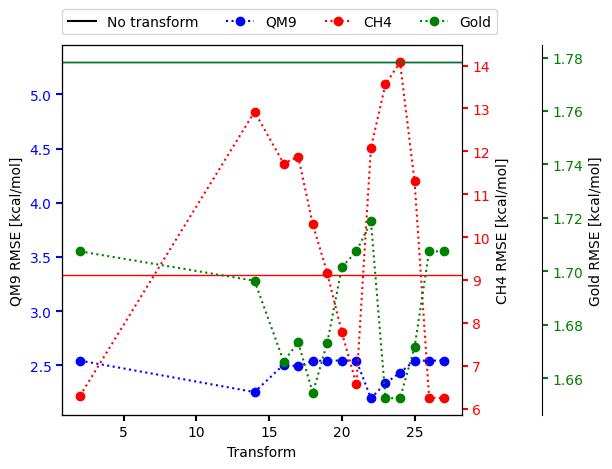

In [25]:
############################### N = 1500 ###############################
### one plot for each data set with all minima:


fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines.right.set_position(("axes", 1.2))

p1, = ax.plot(transforms, minimia_all_tr_qm9 , "bo", label="QM9", ls = ':')  #range(1,no_of_tr+1)
p2, = twin1.plot(transforms, minimia_all_tr_ch4, "r:o", label="CH4")
p3, = twin2.plot(transforms, minimia_all_tr_gold, "g:o", label="Gold")

# ax.set_xlim(0, 2)
# ax.set_ylim(0, 2)
# twin1.set_ylim(0, 4)
# twin2.set_ylim(1, 65)

ax.set_xlabel("Transform")
ax.set_ylabel("QM9 RMSE [kcal/mol]")
#ax.set_title("Minimum RMSE for all transforms")
twin1.set_ylabel("CH4 RMSE [kcal/mol]")
twin2.set_ylabel("Gold RMSE [kcal/mol]")

# ax.yaxis.label.set_color(p1.get_color())
# twin1.yaxis.label.set_color(p2.get_color())
# twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

# Add RMSE without transform
ax.axhline(5.296986389202061, color='blue', linestyle='solid',linewidth=1)
twin1.axhline(9.106809298844597, color='red', linestyle='solid',linewidth=1)
twin2.axhline(77.11187002934794*0.0230605, color='green', linestyle='solid',linewidth=1)
# ax.legend(handles=[p1, p2, p3], loc = 'best')

from matplotlib.lines import Line2D
line1 = Line2D([0], [0], label='No transform', color='black')
fig.legend(handles=[line1, p1, p2, p3], bbox_to_anchor=(0.815, 0.97), ncol=5,)
#plt.savefig('RMSE_all_trafo.png', bbox_inches='tight')


min_err = np.min(minimia_all_tr_qm9)
min_err_idx = np.argmin(minimia_all_tr_qm9)
print('QM9 Min RMSE: {0:.2f}'.format(min_err))
print('QM9 Best transform: ', transforms[min_err_idx])
min_errors_qm9_1500 = min_err

min_err = np.min(minimia_all_tr_ch4)
min_err_idx = np.argmin(minimia_all_tr_ch4)
print('CH4 Min RMSE: {0:.2f}'.format(min_err))
print('CH4 Best transform: ', transforms[min_err_idx])
min_errors_ch4_1500 = min_err

min_err = np.min(minimia_all_tr_gold)
min_err_idx = np.argmin(minimia_all_tr_gold)
print('Gold Min RMSE: {0:.2f}'.format(min_err))
print('Gold Best transform: ', transforms[min_err_idx])
min_errors_gold_1500 = min_err

In [26]:
############################### N = 2000 ###############################

Path = '/home/ach/radial-physics_new/radial-physics/output/All_trafo_all_n/2000'

emaxs = [300, 400, 500, 600, 700]
transforms = [2, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27] #[-2,1,2,3,4,5,6,7,8] # -2 includes the radial scaling
no_of_tr = len(transforms)
minimia_all_tr_qm9 = [1000]*no_of_tr
minimia_all_tr_ch4 = [1000]*no_of_tr
minimia_all_tr_gold = [1000]*no_of_tr

for count,i in enumerate(transforms): # range(1,no_of_tr+1)
    
    for emax in emaxs:

        #Define/reset lists + open data
        factor_qm9 = []#QM9
        rmse_qm9 = []
        data_qm9 = open(Path+f'/Data_TR{i}_E{emax}_qm9','r')

        factor_gold = [] #Gold
        rmse_gold = []
        data_gold = open(Path+f'/Data_TR{i}_E{emax}_gold','r')

        factor_ch4 = [] #Methane
        rmse_ch4 = []
        data_ch4 = open(Path+f'/Data_TR{i}_E{emax}_random-ch4-10k','r')

        for row in data_qm9: #QM9
            row = row.split(' ')
            factor_qm9.append(float(row[0]))
            rmse_qm9.append(float(row[2]))
        
        for row in data_gold: #Gold
            row = row.split(' ')
            factor_gold.append(float(row[0]))
            rmse_gold.append(float(row[2])*0.0230605)
        
        for row in data_ch4: #Methane
            row = row.split(' ')
            factor_ch4.append(float(row[0]))#
            rmse_ch4.append(float(row[2]))
        


        #indices of minima and minima (for plot later)
        minimum_indx_qm9 = np.argmin(rmse_qm9,axis=0)
        minimum_indx_ch4 = np.argmin(rmse_ch4,axis=0)
        minimum_indx_gold = np.argmin(rmse_gold,axis=0)
        
        if rmse_qm9[minimum_indx_qm9] < minimia_all_tr_qm9[count]:
            minimia_all_tr_qm9[count] = (rmse_qm9[minimum_indx_qm9])
        if rmse_ch4[minimum_indx_ch4] < minimia_all_tr_ch4[count]:
            minimia_all_tr_ch4[count] = (rmse_ch4[minimum_indx_ch4])
        if rmse_gold[minimum_indx_gold] < minimia_all_tr_gold[count]:
            minimia_all_tr_gold[count] = (rmse_gold[minimum_indx_gold])

        #extract TR2 error
        if i ==2:
            minimum_TR2_qm9_2000 = np.min(rmse_qm9)
            minimum_TR2_ch4_2000 = np.min(rmse_ch4)
            minimum_TR2_gold_2000 = np.min(rmse_gold)

        '''fig, ax = plt.subplots()
        fig.subplots_adjust(right=0.75)

        twin1 = ax.twinx()
        twin2 = ax.twinx()

        # Offset the right spine of twin2.  The ticks and label have already been
        # placed on the right by twinx above.
        twin2.spines.right.set_position(("axes", 1.2))

        p1, = ax.plot(factor_qm9, rmse_qm9 , "b-o", label="QM9")
        p2, = twin1.plot(factor_ch4, rmse_ch4, "r-o", label="CH4")
        p3, = twin2.plot(factor_gold, rmse_gold, "g-o", label="Gold")

        # ax.set_xlim(0, 2)
        # ax.set_ylim(0, 2)
        # twin1.set_ylim(0, 4)
        # twin2.set_ylim(1, 65)

        ax.set_xlabel("Factor")
        ax.set_ylabel("QM9 RMSE [kcal/mol]")
        ax.set_title(f"Transform {i}, Emax {emax}")
        twin1.set_ylabel("CH4 RMSE [kcal/mol]")
        twin2.set_ylabel("Gold RMSE [kcal/mol]")

        # ax.yaxis.label.set_color(p1.get_color())
        # twin1.yaxis.label.set_color(p2.get_color())
        # twin2.yaxis.label.set_color(p3.get_color())

        tkw = dict(size=4, width=1.5)
        ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
        twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
        twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
        ax.tick_params(axis='x', **tkw)

        # ax.legend(handles=[p1, p2, p3], loc = 'best')
        # fig.legend(bbox_to_anchor=(1, 1.), ncol=5)

        if emax == 300:
            ax.axhline(6.48606410550225, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(14.29748528324583, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(75.34854768632182*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 400:
            ax.axhline(5.636897823738666, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(10.746533371876271, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(71.8378296909377*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 500:
            ax.axhline(5.2070421345602, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(9.477537544893037, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(72.83779633907103*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 600:
            ax.axhline(4.955972837349838, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(8.991879592842958, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(75.19352313634072*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 700:
            ax.axhline(4.8377641834378515, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(8.753874469113619, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(75.28389085238969*0.0230605, color='green', linestyle='solid',linewidth=1)
            
        from matplotlib.lines import Line2D
        line1 = Line2D([0], [0], label='No transform', color='black')
        fig.legend(handles=[line1, p1, p2, p3], bbox_to_anchor=(0.8, 1.02), ncol=5,)

        # ax.legend(handles=[p1, p2, p3], loc = 'best')
        # fig.legend(bbox_to_anchor=(1, 1.), ncol=5,)
        plt.show()'''
        

QM9 Min RMSE: 1.94
QM9 Best transform:  22
CH4 Min RMSE: 5.89
CH4 Best transform:  27
Gold Min RMSE: 1.54
Gold Best transform:  24


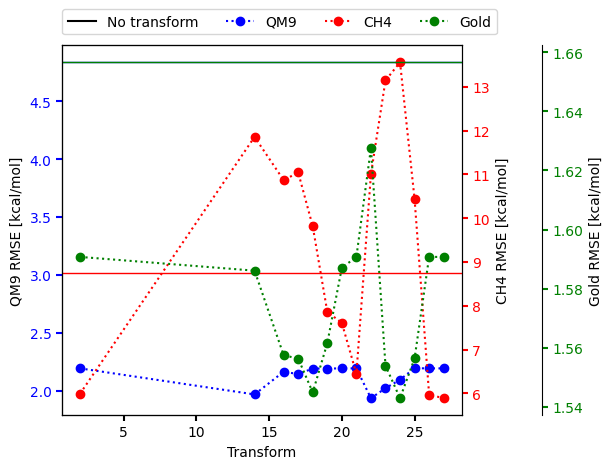

In [27]:
############################### N = 2000 ###############################
### one plot for each data set with all minima:


fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines.right.set_position(("axes", 1.2))

p1, = ax.plot(transforms, minimia_all_tr_qm9 , "bo", label="QM9", ls = ':')  #range(1,no_of_tr+1)
p2, = twin1.plot(transforms, minimia_all_tr_ch4, "r:o", label="CH4")
p3, = twin2.plot(transforms, minimia_all_tr_gold, "g:o", label="Gold")

# ax.set_xlim(0, 2)
# ax.set_ylim(0, 2)
# twin1.set_ylim(0, 4)
# twin2.set_ylim(1, 65)

ax.set_xlabel("Transform")
ax.set_ylabel("QM9 RMSE [kcal/mol]")
#ax.set_title("Minimum RMSE for all transforms")
twin1.set_ylabel("CH4 RMSE [kcal/mol]")
twin2.set_ylabel("Gold RMSE [kcal/mol]")

# ax.yaxis.label.set_color(p1.get_color())
# twin1.yaxis.label.set_color(p2.get_color())
# twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)



# Add RMSE without transform
ax.axhline(4.8377641834378515, color='blue', linestyle='solid',linewidth=1)
twin1.axhline(8.753874469113619, color='red', linestyle='solid',linewidth=1)
twin2.axhline(71.8378296909377*0.0230605, color='green', linestyle='solid',linewidth=1)
# ax.legend(handles=[p1, p2, p3], loc = 'best')

from matplotlib.lines import Line2D
line1 = Line2D([0], [0], label='No transform', color='black')
fig.legend(handles=[line1, p1, p2, p3], bbox_to_anchor=(0.815, 0.97), ncol=5,)
#plt.savefig('RMSE_all_trafo.png', bbox_inches='tight')

min_err = np.min(minimia_all_tr_qm9)
min_err_idx = np.argmin(minimia_all_tr_qm9)
print('QM9 Min RMSE: {0:.2f}'.format(min_err))
print('QM9 Best transform: ', transforms[min_err_idx])
min_errors_qm9_2000 = min_err

min_err = np.min(minimia_all_tr_ch4)
min_err_idx = np.argmin(minimia_all_tr_ch4)
print('CH4 Min RMSE: {0:.2f}'.format(min_err))
print('CH4 Best transform: ', transforms[min_err_idx])
min_errors_ch4_2000 = min_err

min_err = np.min(minimia_all_tr_gold)
min_err_idx = np.argmin(minimia_all_tr_gold)
print('Gold Min RMSE: {0:.2f}'.format(min_err))
print('Gold Best transform: ', transforms[min_err_idx])
min_errors_gold_2000 = min_err


In [28]:
############################### N = 5000 ###############################

Path = '/home/ach/radial-physics_new/radial-physics/output/All_trafo_all_n/5000_new'

emaxs = [300, 400, 500, 600, 700]
transforms = [2, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27] #[-2,1,2,3,4,5,6,7,8] # -2 includes the radial scaling
no_of_tr = len(transforms)
minimia_all_tr_qm9 = [1000]*no_of_tr
minimia_all_tr_ch4 = [1000]*no_of_tr
minimia_all_tr_gold = [1000]*no_of_tr

for count,i in enumerate(transforms): # range(1,no_of_tr+1)
    
    for emax in emaxs:

        #Define/reset lists + open data
        factor_qm9 = []#QM9
        rmse_qm9 = []
        data_qm9 = open(Path+f'/Data_TR{i}_E{emax}_qm9','r')

        factor_gold = [] #Gold
        rmse_gold = []
        data_gold = open(Path+f'/Data_TR{i}_E{emax}_gold','r')

        factor_ch4 = [] #Methane
        rmse_ch4 = []
        data_ch4 = open(Path+f'/Data_TR{i}_E{emax}_random-ch4-10k','r')

        for row in data_qm9: #QM9
            row = row.split(' ')
            factor_qm9.append(float(row[0]))
            rmse_qm9.append(float(row[2]))
        
        for row in data_gold: #Gold
            row = row.split(' ')
            factor_gold.append(float(row[0]))
            rmse_gold.append(float(row[2])*0.0230605)
        
        for row in data_ch4: #Methane
            row = row.split(' ')
            factor_ch4.append(float(row[0]))#
            rmse_ch4.append(float(row[2]))
        


        #indices of minima and minima (for plot later)
        minimum_indx_qm9 = np.argmin(rmse_qm9,axis=0)
        minimum_indx_ch4 = np.argmin(rmse_ch4,axis=0)
        minimum_indx_gold = np.argmin(rmse_gold,axis=0)
        
        if rmse_qm9[minimum_indx_qm9] < minimia_all_tr_qm9[count]:
            minimia_all_tr_qm9[count] = (rmse_qm9[minimum_indx_qm9])
        if rmse_ch4[minimum_indx_ch4] < minimia_all_tr_ch4[count]:
            minimia_all_tr_ch4[count] = (rmse_ch4[minimum_indx_ch4])
        if rmse_gold[minimum_indx_gold] < minimia_all_tr_gold[count]:
            minimia_all_tr_gold[count] = (rmse_gold[minimum_indx_gold])

        #extract TR2 error
        if i ==2:
            minimum_TR2_qm9_5000 = np.min(rmse_qm9)
            minimum_TR2_ch4_5000 = np.min(rmse_ch4)
            minimum_TR2_gold_5000 = np.min(rmse_gold)
        '''
        fig, ax = plt.subplots()
        fig.subplots_adjust(right=0.75)

        twin1 = ax.twinx()
        twin2 = ax.twinx()

        # Offset the right spine of twin2.  The ticks and label have already been
        # placed on the right by twinx above.
        twin2.spines.right.set_position(("axes", 1.2))

        p1, = ax.plot(factor_qm9, rmse_qm9 , "b-o", label="QM9")
        p2, = twin1.plot(factor_ch4, rmse_ch4, "r-o", label="CH4")
        p3, = twin2.plot(factor_gold, rmse_gold, "g-o", label="Gold")

        # ax.set_xlim(0, 2)
        # ax.set_ylim(0, 2)
        # twin1.set_ylim(0, 4)
        # twin2.set_ylim(1, 65)

        ax.set_xlabel("Factor")
        ax.set_ylabel("QM9 RMSE [kcal/mol]")
        ax.set_title(f"Transform {i}, Emax {emax}")
        twin1.set_ylabel("CH4 RMSE [kcal/mol]")
        twin2.set_ylabel("Gold RMSE [kcal/mol]")

        # ax.yaxis.label.set_color(p1.get_color())
        # twin1.yaxis.label.set_color(p2.get_color())
        # twin2.yaxis.label.set_color(p3.get_color())

        tkw = dict(size=4, width=1.5)
        ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
        twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
        twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
        ax.tick_params(axis='x', **tkw)

        # ax.legend(handles=[p1, p2, p3], loc = 'best')
        # fig.legend(bbox_to_anchor=(1, 1.), ncol=5)

        if emax == 300:
            ax.axhline(4.325331749583529, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(8.875583842757695, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(68.73924331075982*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 400:
            ax.axhline(3.6443933060313456, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(7.481033831530375, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(60.726062731146534*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 500:
            ax.axhline(3.3471614650199903, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(7.243013688148776, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(61.77319915471474*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 600:
            ax.axhline(3.198718203714393, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(7.136825214459058, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(64.598674766405*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 700:
            ax.axhline(3.076339436604162, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(6.416840424040768, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(65.42991556091901*0.0230605, color='green', linestyle='solid',linewidth=1)
        
        from matplotlib.lines import Line2D
        line1 = Line2D([0], [0], label='No transform', color='black')
        fig.legend(handles=[line1, p1, p2, p3], bbox_to_anchor=(0.8, 1.02), ncol=5,)

        # ax.legend(handles=[p1, p2, p3], loc = 'best')
        # fig.legend(bbox_to_anchor=(1, 1.), ncol=5,)
        plt.show()
        '''
        

QM9 Min RMSE: 1.30
QM9 Best transform:  22
CH4 Min RMSE: 3.87
CH4 Best transform:  27
Gold Min RMSE: 1.35
Gold Best transform:  24


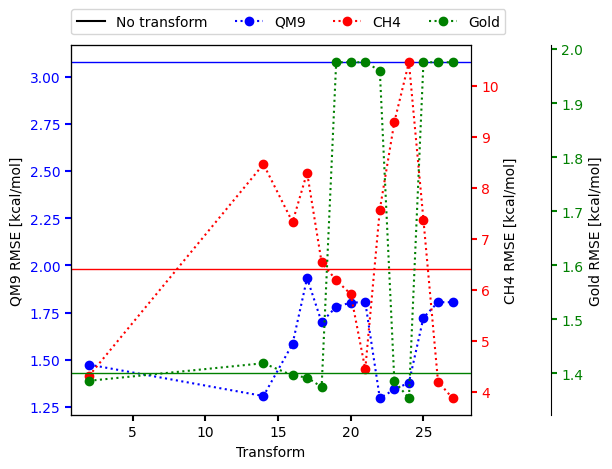

In [29]:
############################### N = 5000 ###############################
### one plot for each data set with all minima:


fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines.right.set_position(("axes", 1.2))

p1, = ax.plot(transforms, minimia_all_tr_qm9 , "bo", label="QM9", ls = ':')  #range(1,no_of_tr+1)
p2, = twin1.plot(transforms, minimia_all_tr_ch4, "r:o", label="CH4")
p3, = twin2.plot(transforms, minimia_all_tr_gold, "g:o", label="Gold")

# ax.set_xlim(0, 2)
# ax.set_ylim(0, 2)
# twin1.set_ylim(0, 4)
# twin2.set_ylim(1, 65)

ax.set_xlabel("Transform")
ax.set_ylabel("QM9 RMSE [kcal/mol]")
#ax.set_title("Minimum RMSE for all transforms")
twin1.set_ylabel("CH4 RMSE [kcal/mol]")
twin2.set_ylabel("Gold RMSE [kcal/mol]")

# ax.yaxis.label.set_color(p1.get_color())
# twin1.yaxis.label.set_color(p2.get_color())
# twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)


# Add RMSE without transform
ax.axhline(3.076339436604162, color='blue', linestyle='solid',linewidth=1)
twin1.axhline(6.416840424040768, color='red', linestyle='solid',linewidth=1)
twin2.axhline(60.726062731146534*0.0230605, color='green', linestyle='solid',linewidth=1)
# ax.legend(handles=[p1, p2, p3], loc = 'best')

from matplotlib.lines import Line2D
line1 = Line2D([0], [0], label='No transform', color='black')
fig.legend(handles=[line1, p1, p2, p3], bbox_to_anchor=(0.815, 0.97), ncol=5,)
#plt.savefig('RMSE_all_trafo.png', bbox_inches='tight')

min_err = np.min(minimia_all_tr_qm9)
min_err_idx = np.argmin(minimia_all_tr_qm9)
print('QM9 Min RMSE: {0:.2f}'.format(min_err))
print('QM9 Best transform: ', transforms[min_err_idx])
min_errors_qm9_5000 = min_err

min_err = np.min(minimia_all_tr_ch4)
min_err_idx = np.argmin(minimia_all_tr_ch4)
print('CH4 Min RMSE: {0:.2f}'.format(min_err))
print('CH4 Best transform: ', transforms[min_err_idx])
min_errors_ch4_5000 = min_err

min_err = np.min(minimia_all_tr_gold)
min_err_idx = np.argmin(minimia_all_tr_gold)
print('Gold Min RMSE: {0:.2f}'.format(min_err))
print('Gold Best transform: ', transforms[min_err_idx])
min_errors_gold_5000 = min_err


In [31]:
############################### N = 10000 ###############################

Path = '/home/ach/radial-physics_new/radial-physics/output/All_trafo_all_n/10000'
### !!! CH4 is with n_train = 9000 !!! ###


emaxs = [300, 400, 500, 600, 700]
transforms = [2, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27] #[-2,1,2,3,4,5,6,7,8] # -2 includes the radial scaling
no_of_tr = len(transforms)
minimia_all_tr_qm9 = [1000]*no_of_tr
minimia_all_tr_ch4 = [1000]*no_of_tr
minimia_all_tr_gold = [1000]*no_of_tr

for count,i in enumerate(transforms): # range(1,no_of_tr+1)
    
    for emax in emaxs:

        #Define/reset lists + open data
        factor_qm9 = []#QM9
        rmse_qm9 = []
        data_qm9 = open(Path+f'/Data_TR{i}_E{emax}_qm9','r')

        factor_gold = [] #Gold
        rmse_gold = []
        data_gold = open(Path+f'/Data_TR{i}_E{emax}_gold','r')

        factor_ch4 = [] #Methane
        rmse_ch4 = []
        data_ch4 = open(Path+f'/Data_TR{i}_E{emax}_random-ch4-10k','r')

        for row in data_qm9: #QM9
            row = row.split(' ')
            factor_qm9.append(float(row[0]))
            rmse_qm9.append(float(row[2]))
        
        for row in data_gold: #Gold
            row = row.split(' ')
            factor_gold.append(float(row[0]))
            rmse_gold.append(float(row[2])*0.0230605)
        
        for row in data_ch4: #Methane
            row = row.split(' ')
            factor_ch4.append(float(row[0]))#
            rmse_ch4.append(float(row[2]))
        

        # print('TR',i ,' E', emax, 'qm9:', rmse_qm9, 'ch4: ', rmse_ch4, 'gold: ', rmse_gold)

        #indices of minima and minima (for plot later)
        minimum_indx_qm9 = np.argmin(rmse_qm9,axis=0)
        minimum_indx_ch4 = np.argmin(rmse_ch4,axis=0)
        minimum_indx_gold = np.argmin(rmse_gold,axis=0)
        
        if rmse_qm9[minimum_indx_qm9] < minimia_all_tr_qm9[count]:
            minimia_all_tr_qm9[count] = (rmse_qm9[minimum_indx_qm9])
        if rmse_ch4[minimum_indx_ch4] < minimia_all_tr_ch4[count]:
            minimia_all_tr_ch4[count] = (rmse_ch4[minimum_indx_ch4])
        if rmse_gold[minimum_indx_gold] < minimia_all_tr_gold[count]:
            minimia_all_tr_gold[count] = (rmse_gold[minimum_indx_gold])

        #extract TR2 error
        if i ==2:
            minimum_TR2_qm9_10000 = np.min(rmse_qm9)
            minimum_TR2_ch4_10000 = np.min(rmse_ch4)
            minimum_TR2_gold_10000 = np.min(rmse_gold)
        '''
        fig, ax = plt.subplots()
        fig.subplots_adjust(right=0.75)

        twin1 = ax.twinx()
        twin2 = ax.twinx()

        # Offset the right spine of twin2.  The ticks and label have already been
        # placed on the right by twinx above.
        twin2.spines.right.set_position(("axes", 1.2))

        p1, = ax.plot(factor_qm9, rmse_qm9 , "b-o", label="QM9")
        p2, = twin1.plot(factor_ch4, rmse_ch4, "r-o", label="CH4")
        p3, = twin2.plot(factor_gold, rmse_gold, "g-o", label="Gold")

        # ax.set_xlim(0, 2)
        # ax.set_ylim(0, 2)
        # twin1.set_ylim(0, 4)
        # twin2.set_ylim(1, 65)

        ax.set_xlabel("Factor")
        ax.set_ylabel("QM9 RMSE [kcal/mol]")
        ax.set_title(f"Transform {i}, Emax {emax}")
        twin1.set_ylabel("CH4 RMSE [kcal/mol]")
        twin2.set_ylabel("Gold RMSE [kcal/mol]")

        # ax.yaxis.label.set_color(p1.get_color())
        # twin1.yaxis.label.set_color(p2.get_color())
        # twin2.yaxis.label.set_color(p3.get_color())

        tkw = dict(size=4, width=1.5)
        ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
        twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
        twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
        ax.tick_params(axis='x', **tkw)

        # ax.legend(handles=[p1, p2, p3], loc = 'best')
        # fig.legend(bbox_to_anchor=(1, 1.), ncol=5)

        if emax == 300:
            ax.axhline(4.325331749583529, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(8.875583842757695, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(68.73924331075982*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 400:
            ax.axhline(3.6443933060313456, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(7.481033831530375, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(60.726062731146534*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 500:
            ax.axhline(3.3471614650199903, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(7.243013688148776, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(61.77319915471474*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 600:
            ax.axhline(3.198718203714393, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(7.136825214459058, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(64.598674766405*0.0230605, color='green', linestyle='solid',linewidth=1)
        elif emax == 700:
            ax.axhline(3.076339436604162, color='blue', linestyle='solid',linewidth=1)
            twin1.axhline(6.416840424040768, color='red', linestyle='solid',linewidth=1)
            twin2.axhline(65.42991556091901*0.0230605, color='green', linestyle='solid',linewidth=1)
        
        from matplotlib.lines import Line2D
        line1 = Line2D([0], [0], label='No transform', color='black')
        fig.legend(handles=[line1, p1, p2, p3], bbox_to_anchor=(0.8, 1.02), ncol=5,)

        # ax.legend(handles=[p1, p2, p3], loc = 'best')
        # fig.legend(bbox_to_anchor=(1, 1.), ncol=5,)
        plt.show()'''
        

ValueError: attempt to get argmin of an empty sequence

QM9 Min RMSE: 1.03
QM9 Best transform:  22
Gold Min RMSE: 1.23
Gold Best transform:  24


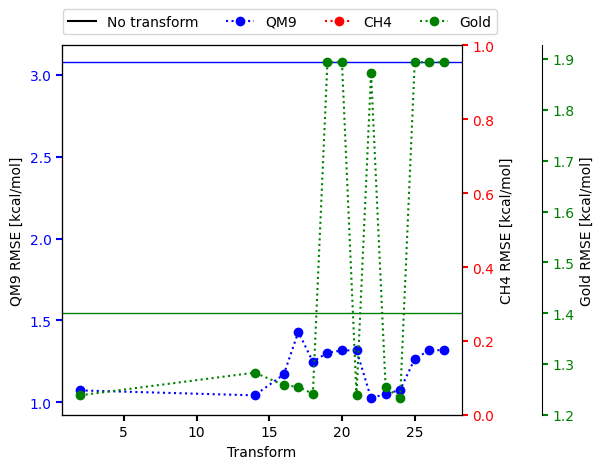

In [ ]:
############################### N = 10000 ###############################
### one plot for each data set with all minima:


fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines.right.set_position(("axes", 1.2))

p1, = ax.plot(transforms, minimia_all_tr_qm9 , "bo", label="QM9", ls = ':')  #range(1,no_of_tr+1)
p2, = twin1.plot(transforms, minimia_all_tr_ch4, "r:o", label="CH4")
p3, = twin2.plot(transforms, minimia_all_tr_gold, "g:o", label="Gold")

# ax.set_xlim(0, 2)
# ax.set_ylim(0, 2)
# twin1.set_ylim(0, 4)
# twin2.set_ylim(1, 65)

ax.set_xlabel("Transform")
ax.set_ylabel("QM9 RMSE [kcal/mol]")
#ax.set_title("Minimum RMSE for all transforms")
twin1.set_ylabel("CH4 RMSE [kcal/mol]")
twin2.set_ylabel("Gold RMSE [kcal/mol]")

# ax.yaxis.label.set_color(p1.get_color())
# twin1.yaxis.label.set_color(p2.get_color())
# twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)


# Add RMSE without transform
ax.axhline(3.076339436604162, color='blue', linestyle='solid',linewidth=1)
# twin1.axhline(6.416840424040768, color='red', linestyle='solid',linewidth=1)
twin2.axhline(60.726062731146534*0.0230605, color='green', linestyle='solid',linewidth=1)
# ax.legend(handles=[p1, p2, p3], loc = 'best')

from matplotlib.lines import Line2D
line1 = Line2D([0], [0], label='No transform', color='black')
fig.legend(handles=[line1, p1, p2, p3], bbox_to_anchor=(0.815, 0.97), ncol=5,)
#plt.savefig('RMSE_all_trafo.png', bbox_inches='tight')

min_err = np.min(minimia_all_tr_qm9)
min_err_idx = np.argmin(minimia_all_tr_qm9)
print('QM9 Min RMSE: {0:.2f}'.format(min_err))
print('QM9 Best transform: ', transforms[min_err_idx])
min_errors_qm9_10000 = min_err

min_err = np.min(minimia_all_tr_ch4)
min_err_idx = np.argmin(minimia_all_tr_ch4)
print('CH4 Min RMSE: {0:.2f}'.format(min_err))
print('CH4 Best transform: ', transforms[min_err_idx])
min_errors_ch4_10000 = min_err

min_err = np.min(minimia_all_tr_gold)
min_err_idx = np.argmin(minimia_all_tr_gold)
print('Gold Min RMSE: {0:.2f}'.format(min_err))
print('Gold Best transform: ', transforms[min_err_idx])
min_errors_gold_10000 = min_err


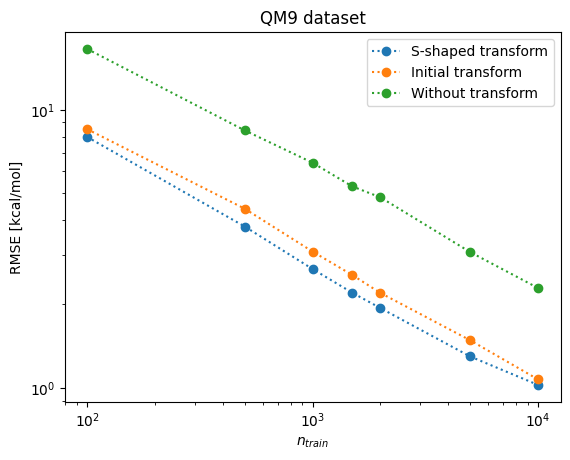

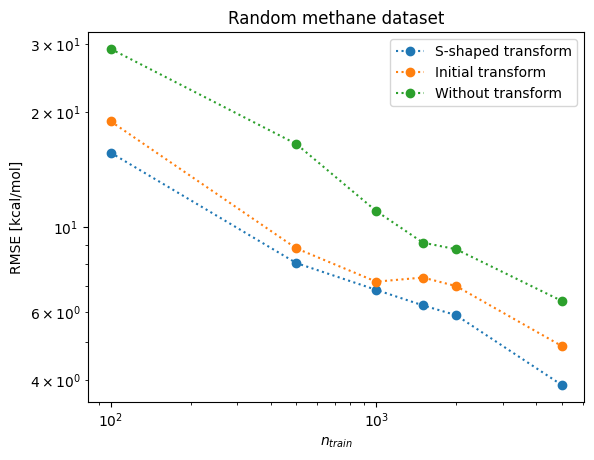

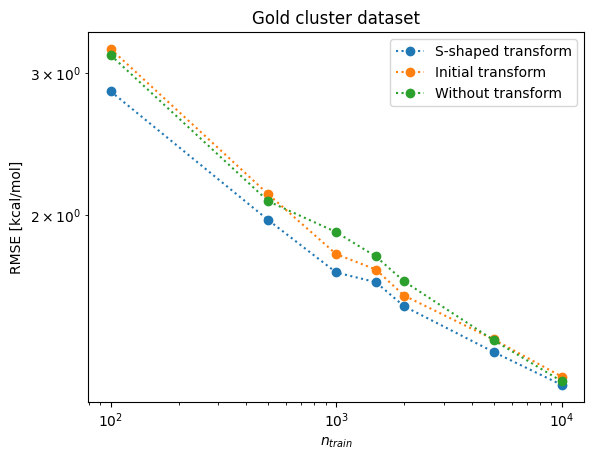

In [ ]:
all_n = [100, 500, 1000, 1500, 2000, 5000, 10000]
all_n_ch4 = [100, 500, 1000, 1500, 2000, 5000]


min_errors_qm9 = [min_errors_qm9_100, min_errors_qm9_500, min_errors_qm9_1000, min_errors_qm9_1500, min_errors_qm9_2000, min_errors_qm9_5000, min_errors_qm9_10000]
min_errors_ch4 = [min_errors_ch4_100, min_errors_ch4_500, min_errors_ch4_1000, min_errors_ch4_1500, min_errors_ch4_2000, min_errors_ch4_5000]#, min_errors_ch4_10000]
min_errors_gold = [min_errors_gold_100, min_errors_gold_500, min_errors_gold_1000, min_errors_gold_1500, min_errors_gold_2000, min_errors_gold_5000, min_errors_gold_10000]

# reference without transform 
min_errors_qm9_TR0 = [16.516343131938108, 8.418524498467612, 6.440701270931685, 5.296986389202061, 4.8377641834378515, 3.076339436604162, 2.2851176278950707]
min_errors_ch4_TR0 = [29.177390257782466, 16.478870024988346, 11.014133660205427, 9.106809298844597, 8.753874469113619, 6.416840424040768]
min_errors_gold_TR0 =[136.8698847586963, 90.2603631096119, 82.65392374237348, 77.11187002934794, 71.8378296909377, 60.726062731146534, 54.02594837579014]
min_errors_gold_TR0 = np.array(min_errors_gold_TR0)*0.0230605

# reference with transform 2
min_errors_qm9_TR2 = [minimum_TR2_qm9_100, minimum_TR2_qm9_500, minimum_TR2_qm9_1000, minimum_TR2_qm9_1500, minimum_TR2_qm9_2000, minimum_TR2_qm9_5000, minimum_TR2_qm9_10000]
min_errors_ch4_TR2 = [minimum_TR2_ch4_100, minimum_TR2_ch4_500, minimum_TR2_ch4_1000, minimum_TR2_ch4_1500, minimum_TR2_ch4_2000, minimum_TR2_ch4_5000]#, minimum_TR2_ch4_10000]
min_errors_gold_TR2 = [minimum_TR2_gold_100, minimum_TR2_gold_500, minimum_TR2_gold_1000, minimum_TR2_gold_1500, minimum_TR2_gold_2000, minimum_TR2_gold_5000, minimum_TR2_gold_10000]

plt.plot(all_n, min_errors_qm9, label = 'S-shaped transform', marker='o', linestyle = 'dotted')
plt.plot(all_n, min_errors_qm9_TR2, label = 'Initial transform', marker='o', linestyle = 'dotted')
plt.plot(all_n, min_errors_qm9_TR0, label = 'Without transform', marker='o', linestyle = 'dotted')
plt.title('QM9 dataset')
plt.xticks(all_n)
plt.xlabel(r'$n_{train}$')
plt.xscale("log")
plt.yscale("log")
plt.ylabel('RMSE [kcal/mol]')
plt.legend()
plt.savefig('all_n_qm9.png', bbox_inches='tight')
plt.show()

plt.plot(all_n_ch4, min_errors_ch4, label = 'S-shaped transform', marker='o', linestyle = 'dotted')
plt.plot(all_n_ch4, min_errors_ch4_TR2, label = 'Initial transform', marker='o', linestyle = 'dotted')
plt.plot(all_n_ch4, min_errors_ch4_TR0, label = 'Without transform', marker='o', linestyle = 'dotted')
plt.title('Random methane dataset')
plt.xticks(all_n_ch4)
plt.xlabel(r'$n_{train}$')
plt.yscale("log")
plt.ylabel('RMSE [kcal/mol]')
plt.xscale("log")
plt.legend()
plt.savefig('all_n_ch4.png', bbox_inches='tight')
plt.show()

plt.plot(all_n, min_errors_gold, label = 'S-shaped transform', marker='o', linestyle = 'dotted')
plt.plot(all_n, min_errors_gold_TR2, label = 'Initial transform', marker='o', linestyle = 'dotted')
plt.plot(all_n, min_errors_gold_TR0, label = 'Without transform', marker='o', linestyle = 'dotted')
plt.title('Gold cluster dataset')
plt.xticks(all_n)
plt.ylabel('RMSE [kcal/mol]')
plt.xlabel(r'$n_{train}$')
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.savefig('all_n_gold.png', bbox_inches='tight')
plt.show()
